**Name:** Bala Guga Gopal S

**Script Name:** Forecasting Stock market Price : Google Stock Price Data

**Script Description:** Forecasting Stock market Price for Google Stocks using the Given data set (test.csv and train.csv)

# Contents

1. Import libraries
2. Exploratory
3. Preprocessing the data - (Train and test split)
4. RNN model
5. Train the model
6. Predictiom
7. Evaluation

# Import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [ ]:
print(os.listdir("/content"))

['.config', 'Google_Stock_Price_Train[1].csv', 'Google_Stock_Price_Test[1].csv', 'sample_data']


# Exploratory Analysis 

from kaggle (https://www.kaggle.com/code/kerneler/starter-google-stock-prices-training-2f3cbf43-b) 

In [ ]:
# libraries
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [ ]:
#reading the nput csv

nRowsRead = 1000 # specify 'None' if want to read whole file
# Google_Stock_Price_Test.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/content/Google_Stock_Price_Test.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'Google_Stock_Price_Test.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 125 rows and 6 columns


In [ ]:
#a quick look at what the data looks like

df1.head(5)

,Date,Open,High,Low,Close,Volume
0,02/01/2018,1048.339966,1066.939941,1045.229980,1065.000000,1237600
1,03/01/2018,1064.310059,1086.290039,1063.209961,1082.479980,1430200
2,04/01/2018,1088.000000,1093.569946,1084.001953,1086.400024,1004600
3,05/01/2018,1094.000000,1104.250000,1092.000000,1102.229980,1279100
4,08/01/2018,1102.229980,1111.270020,1101.619995,1106.939941,1047600


In [ ]:
# Distribution graphs (histogram/bar graph) of sampled columns:

plotPerColumnDistribution(df1, 10,5)

<Figure size 2400x512 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  after removing the cwd from sys.path.


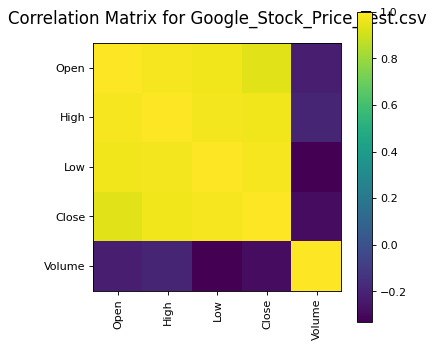

In [ ]:
# Correlation matrix:

plotCorrelationMatrix(df1, 5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """


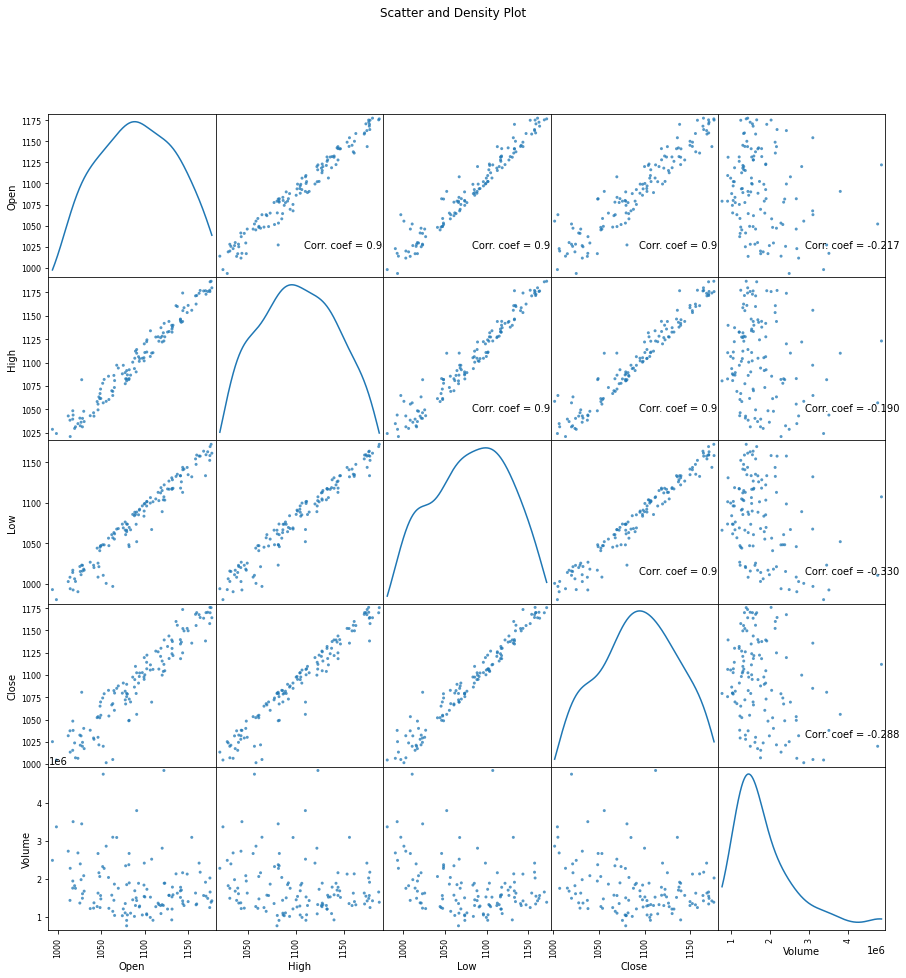

In [ ]:
plotScatterMatrix(df1, 15, 10)

In [ ]:
# Test data

nRowsRead = 1000 # specify 'None' if want to read whole file
# Google_Stock_Price_Train.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('/content/Google_Stock_Price_Train.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'Google_Stock_Price_Train.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 6 columns


In [ ]:
df2.head(5)

,Date,Open,High,Low,Close,Volume
0,01/03/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,01/04/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,01/05/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,01/06/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,01/09/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
plotPerColumnDistribution(df2, 10, 5)

<Figure size 2400x512 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  after removing the cwd from sys.path.


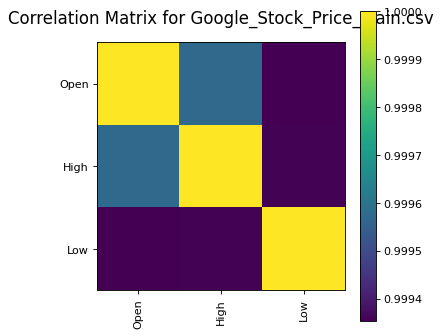

In [ ]:
# Corelation matrix

plotCorrelationMatrix(df2, 5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """


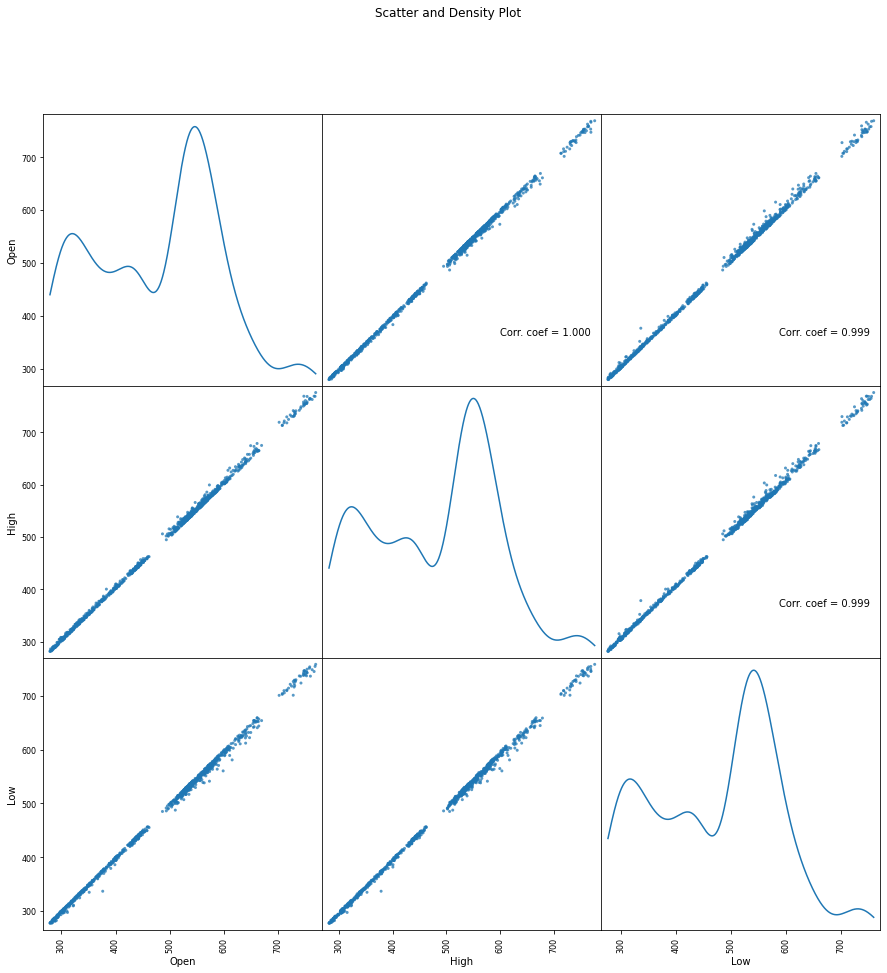

In [ ]:
# Scatter and density plots:

plotScatterMatrix(df2, 15, 10)

# Preprocessing the data - (Train and test split)

In [ ]:
dataset_train = pd.read_csv('/content/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

Creating a data structure with 60 timesteps and 1 output

In [ ]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# Reshaping

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# RNN model

In [ ]:
# Keras libraries 

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
model = Sequential()

In [ ]:
# Adding the first LSTM layer and some Dropout regularisation

model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

#Adding a second LSTM layer and some Dropout regularisation

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation¶

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

#Adding the output layer
model.add(Dense(units = 1))

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

# Train the model

In [ ]:
history = model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 14s 125ms/step - loss: 0.0151
Epoch 2/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0030
Epoch 3/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0024
Epoch 4/100
38/38 [==============================] - 5s 118ms/step - loss: 0.0022
Epoch 5/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0022
Epoch 6/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0021
Epoch 7/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0020
Epoch 8/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0018
Epoch 9/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0018
Epoch 10/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0020
Epoch 11/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0018
Epoch 12/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0020
Epoch 13/100

# Prediction

In [ ]:
dataset_test = pd.read_csv('/content/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,02/01/2018,1048.339966,1066.939941,1045.229980,1065.000000,1237600
1,03/01/2018,1064.310059,1086.290039,1063.209961,1082.479980,1430200
2,04/01/2018,1088.000000,1093.569946,1084.001953,1086.400024,1004600
3,05/01/2018,1094.000000,1104.250000,1092.000000,1102.229980,1279100
4,08/01/2018,1102.229980,1111.270020,1101.619995,1106.939941,1047600


In [ ]:
stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:
# Fetch 60 timesteps by combining train and test got prediction

total_df = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = total_df[len(total_df) - len(dataset_test) -  60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

In [ ]:
# Reshape the dataset

x_test = []
for i in range(60, len(inputs)):
    x_test.append(inputs[i-60:i, 0])    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predicted_stock_price = model.predict(x_test)
predicted_stock_price

array([[0.9782059 ],
       [0.9768256 ],
       [0.9818305 ],
       [0.9960555 ],
       [1.0112318 ],
       [1.0229089 ],
       [1.0307498 ],
       [1.0301467 ],
       [1.0291666 ],
       [1.0283759 ],
       [1.0385703 ],
       [1.0491147 ],
       [1.0571407 ],
       [1.0616442 ],
       [1.0654122 ],
       [1.0757767 ],
       [1.0919092 ],
       [1.102687  ],
       [1.1076298 ],
       [1.1094477 ],
       [1.1072646 ],
       [1.1059664 ],
       [1.1039253 ],
       [1.0893162 ],
       [1.0646579 ],
       [1.0255116 ],
       [1.0100935 ],
       [1.0061581 ],
       [0.9944099 ],
       [0.98976135],
       [0.98964655],
       [0.99107444],
       [1.0005808 ],
       [1.0127765 ],
       [1.0207515 ],
       [1.0279247 ],
       [1.0354726 ],
       [1.039404  ],
       [1.0454748 ],
       [1.0559168 ],
       [1.0590888 ],
       [1.0529628 ],
       [1.0284297 ],
       [1.0117875 ],
       [1.0153472 ],
       [1.024552  ],
       [1.0396389 ],
       [1.058

In [ ]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[1057.8501],
       [1056.7512],
       [1060.7355],
       [1072.0598],
       [1084.1414],
       [1093.4373],
       [1099.6792],
       [1099.1991],
       [1098.4188],
       [1097.7894],
       [1105.9049],
       [1114.2992],
       [1120.6885],
       [1124.2737],
       [1127.2732],
       [1135.5242],
       [1148.367 ],
       [1156.947 ],
       [1160.8818],
       [1162.3291],
       [1160.5912],
       [1159.5577],
       [1157.9329],
       [1146.3027],
       [1126.6729],
       [1095.5092],
       [1083.2351],
       [1080.1023],
       [1070.7498],
       [1067.0491],
       [1066.9578],
       [1068.0945],
       [1075.6622],
       [1085.371 ],
       [1091.7197],
       [1097.4302],
       [1103.439 ],
       [1106.5687],
       [1111.4015],
       [1119.7141],
       [1122.2394],
       [1117.3625],
       [1097.8323],
       [1084.5837],
       [1087.4176],
       [1094.7452],
       [1106.7556],
       [1121.6335],
       [1139.0153],
       [1151.8668],


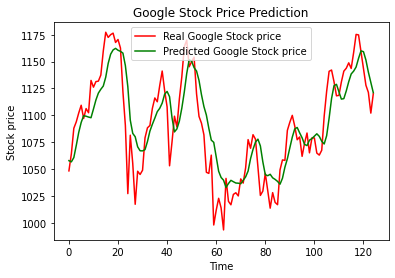

In [ ]:
# VISULAIZIE

plt.plot(stock_price, color = 'red', label = 'Real Google Stock price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Google Stock price')
plt.title("Google Stock Price Prediction")
plt.xlabel('Time')
plt.ylabel('Stock price')
plt.legend()
plt.show()

# Evaluation

In [ ]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(stock_price, predicted_stock_price))
print(f"Mean square error : {rmse}")

Mean square error : 25.699306670800706


# Refereences

1.https://www.kaggle.com/datasets/vaibhavsxn/google-stock-prices-training-and-test-data/code